In [1]:
import utilities as ut
import pandas as pd
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from shapely.geometry import Polygon, Point, MultiPolygon
import numpy as np
import geopandas as gpd
import contextily as cx
from shapely.geometry import Polygon, Point, MultiPolygon
import os
from tqdm import tqdm
import ast

In [6]:
# create a list of latitudes and longitudes pairs for the loop to go through
latitudes = np.arange(-73.614288,-73.483738,0.02)
longitudes = np.arange(45.462463,45.642293,0.02)
len(latitudes)
len(longitudes)

9

In [ ]:

# write a code that collects all data from pycitylayers in installments, so that the server does not crash
# start by a location on top of mont royal mountain and a small radius, then extract all data from that and write it in a parquet file, then 
# expand the radius and repeat the process until you have all the data you need, checking for the data you already have in the parquet file through checking the index

for latitude in latitudes:
    for longitude in longitudes:
        print('latitude is:',latitude, 'longitude is:',longitude)

        for i in range(1,5):
            radius = 0.008*i
            print('radius is:',radius)
            # check if file "all_pcl_data.parquet" exists
            if os.path.isfile("all_pcl_data.parquet"):
                # read the file
                df_old = pd.read_parquet("all_pcl_data.parquet")
            else:
                # create an empty dataframe
                df_old = pd.DataFrame(columns=['index'])

            df_new = ut.building_extract(x=latitude,y=longitude,r=radius)

            # check to see which rows are already in the file
            mask = df_new['index'].isin(df_old['index'])
            # drop the rows that are already in the file
            df_new = df_new[~mask]
            # append the new data to the old data
            df = df_old.append(df_new)
            # save the new data
            df.to_parquet("all_pcl_data.parquet")
            # print the number of rows in the new data
            print(len(df_new))
            # delete the latitudes and longitudes that have been used from the latitudes and longitudes lists
        longitudes = longitudes[longitudes!=longitude]
    latitudes = latitudes[latitudes!=latitude]
    # cleat the output of the cell after each iteration
    clear_output(wait=True)




In [2]:
downloaded_data = pd.read_parquet("all_pcl_data.parquet")
len(downloaded_data)

188965

In [3]:
# rename the column uid to 'ID_UEV' and turn its type into integer

downloaded_data['uid'] = downloaded_data['uid'].astype(int)
downloaded_data.rename(columns={'uid':'ID_UEV'}, inplace=True)

there is 'geom' in columns


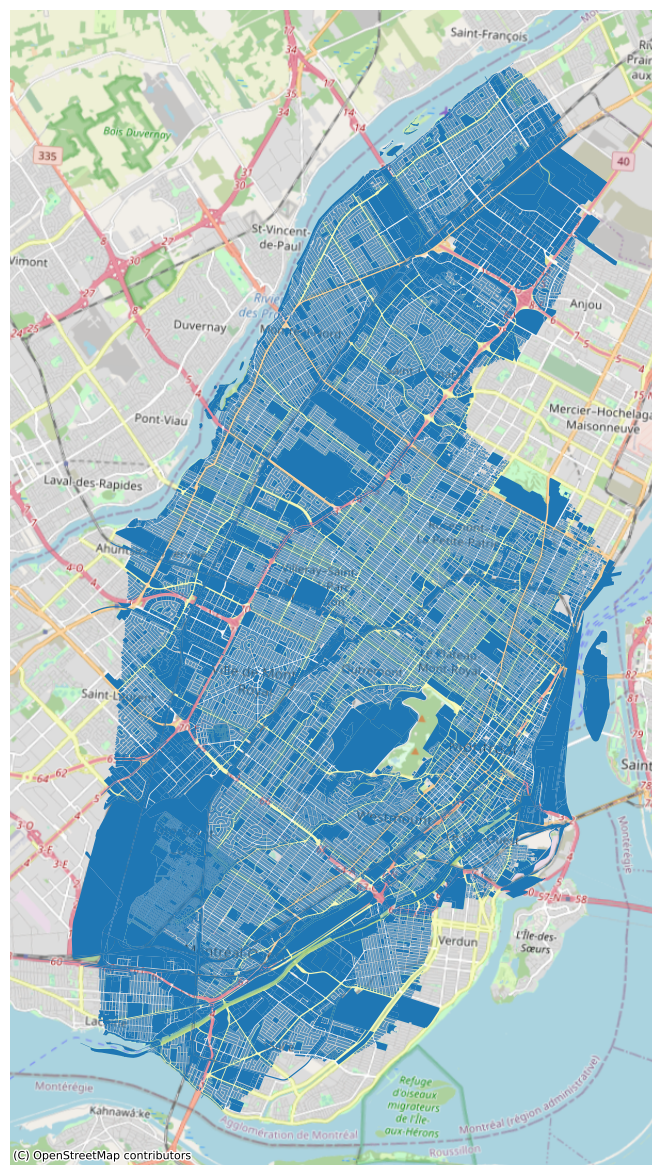

In [38]:
ut.plot_it(downloaded_data,edgecolor='None')

In [13]:
downloaded_data[downloaded_data['index']==8]

index borough_id  building_number  built_area  dwelling_number  \
2      8      REM19           2212.0       354.0              6.0   

  firstletter_apt                                               geom  \
2               0  {'coordinates': [[[-73.58445956  45.49075118],...   

   land_area  landuse_code landuse_text lastletter_apt  max_floors  \
2      178.0        1000.0     Logement              0         3.0   

   municipality_code       nad83_registration  \
2               50.0  9838-19-9094-8-000-0000   

                                 street_name  street_number        uid  \
2  boulevard De Maisonneuve Ouest  (MTL+WMT)         2214.0  1037770.0   

  unit_category unit_number  year_built  
2      Régulier           0      1900.0

In [7]:
downloaded_data.head()

index borough_id  building_number  built_area  dwelling_number  \
0    124      REM21           3700.0       142.0              2.0   
1    125      REM21           3704.0       126.0              2.0   
2    132      REM21           3710.0       131.0              2.0   
3    186      REM21            227.0       232.0              3.0   
4    187      REM21           3952.0       158.0              2.0   

  firstletter_apt                                               geom  \
0               0  {'coordinates': [[[-73.5732125   45.51600746],...   
1               0  {'coordinates': [[[-73.5732781   45.51603721],...   
2               0  {'coordinates': [[[-73.5734092   45.51609688],...   
3               0  {'coordinates': [[[-73.57990538  45.52033136],...   
4               0  {'coordinates': [[[-73.57594988  45.51925783],...   

   land_area  landuse_code landuse_text lastletter_apt  max_floors  \
0      181.0        1000.0     Logement              A         2.0   
1      147.0        1000.0     Logement              0         2.0   
2      139.0        1000.0     Logement              0         2.0   
3      172.0        1000.0     Logement              0         0.0   
4      132.0        1000.0     Logement              0         2.0   

   municipality_code       nad83_registration                 street_name  \
0               50.0  9941-07-7778-5-000-0000       rue De Bullion  (MTL)   
1               50.0  9941-07-6585-5-000-0000       rue De Bullion  (MTL)   
2               50.0  9941-07-6088-0-000-0000       rue De Bullion  (MTL)   
3               50.0  9842-52-6062-1-000-0000       rue Rachel Est  (MTL)   
4               50.0  9842-81-6341-8-000-0000  avenue Henri-Julien  (MTL)   

   street_number     ID_UEV unit_category unit_number  year_built  
0         3700.0  1042247.0      Régulier           0      1875.0  
1         3706.0  1042249.0      Régulier           0      1982.0  
2         3710.0  1042250.0      Régulier           0      1982.0  
3          229.0  1041528.0      Régulier           0      1944.0  
4         3954.0  1042747.0      Régulier           0      1885.0

In [8]:
HQ_scrapped = pd.read_csv(r"C:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\bldg_success_list.csv")
# turn the type of the column ID_UEV into string
# HQ_scrapped[''] = HQ_scrapped['ID_UEV'].astype(int)

HQ_scrapped.head()


ID_UEV  street_number postal_code  Error_Code  Price  Consumption
0  2043512          12030     H1E 4B5           0  3,200        30700
1  2043512          12030     H1E 4B5           0  3,200        30700
2  2007636          12375     H1E 1Y7           0  2,990        28790
3  2043512          12030     H1E 4B5           0  3,200        30700
4  2007636          12375     H1E 1Y7           0  2,990        28790

In [9]:
HQ_scrapped.shape

(15555, 6)

In [10]:
downloaded_data['ID_UEV']

0        1042247
1        1042249
2        1042250
3        1041528
4        1042747
          ...   
28314    2083521
28324    5288612
28354    2083781
28355    2084063
28442    2086395
Name: ID_UEV, Length: 188965, dtype: int32

In [11]:
downloaded_data['ID_UEV'].isin(HQ_scrapped['ID_UEV']).value_counts()

False    184881
True       4084
Name: ID_UEV, dtype: int64

there is 'geom' in columns


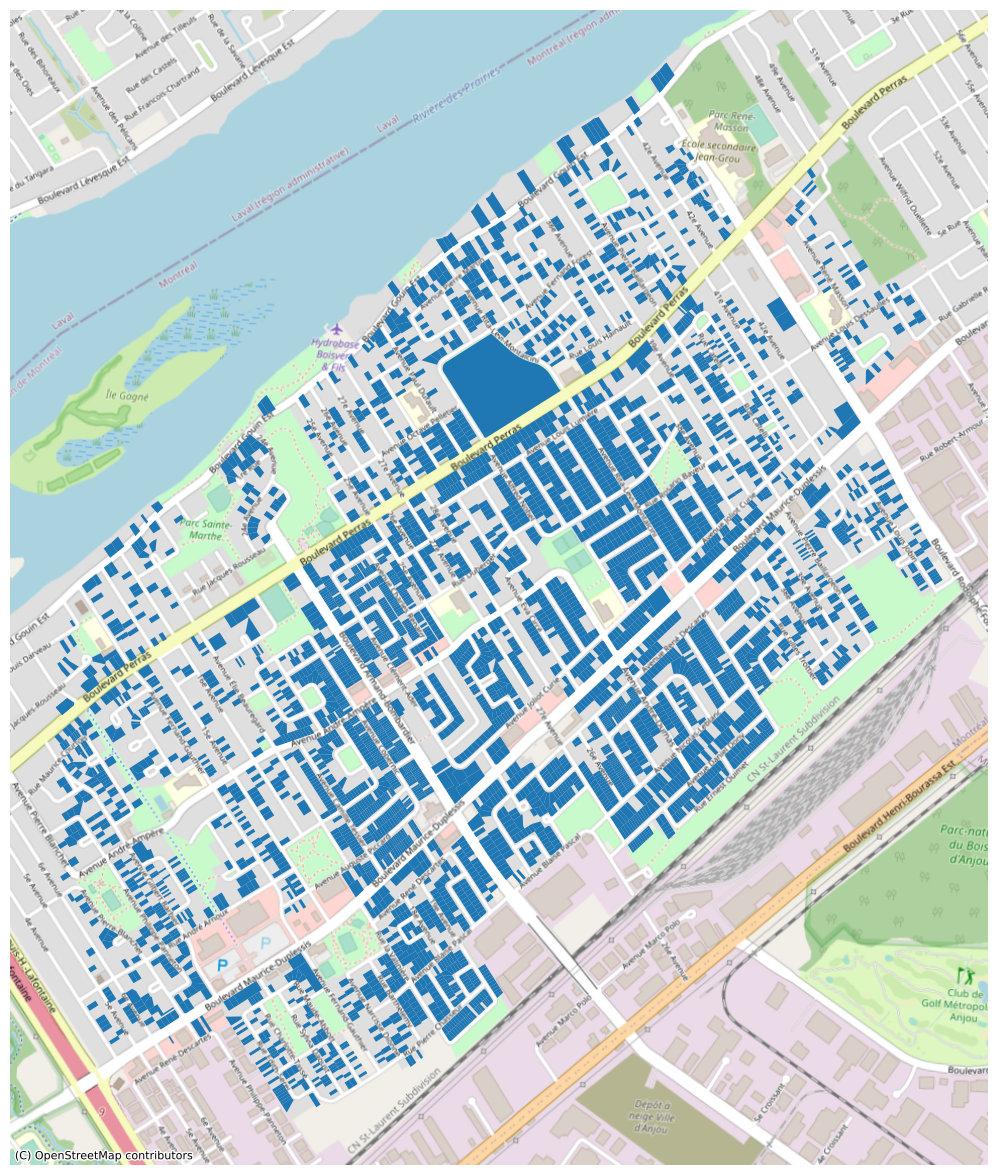

In [12]:
mask = downloaded_data['ID_UEV'].isin(HQ_scrapped['ID_UEV'])
downloaded_data_masked = downloaded_data[mask]
ut.plot_it(downloaded_data_masked,edgecolor='None')

In [ ]:
px.scatter(downloaded_data[~mask]['ID_UEV'])

In [ ]:
px.scatter(downloaded_data[mask]['ID_UEV'])

In [25]:
downloaded_data_masked

index borough_id  building_number  built_area  dwelling_number  \
456     29881      REM33          12360.0       147.0              1.0   
752     51510      REM33           7556.0       452.0              1.0   
5941    84974      REM33          12237.0       127.0              1.0   
5942    84975      REM33          12241.0       127.0              1.0   
6126    89274      REM33          12193.0       126.0              1.0   
...       ...        ...              ...         ...              ...   
4592    64498      REM33           8951.0        93.0              1.0   
7318    91900      REM33          12280.0       168.0              1.0   
7669   106917      REM33          12275.0       249.0              1.0   
9928   228953      REM33          12725.0        95.0              1.0   
12889  313765      REM33          12654.0       131.0              1.0   

      firstletter_apt                                               geom  \
456                 0  {'coordinates': [[[-73.60538916  45.63010714],...   
752                 0  {'coordinates': [[[-73.59828376  45.62555336],...   
5941                0  {'coordinates': [[[-73.60180222  45.62901205],...   
5942                0  {'coordinates': [[[-73.60215589  45.62891122],...   
6126                0  {'coordinates': [[[-73.60122662  45.62847145],...   
...               ...                                                ...   
4592                0  {'coordinates': [[[-73.58141581  45.65054323],...   
7318                0  {'coordinates': [[[-73.57472521  45.6482219 ],...   
7669                0  {'coordinates': [[[-73.57372522  45.64864515],...   
9928                0  {'coordinates': [[[-73.58684583  45.64893082],...   
12889               0  {'coordinates': [[[-73.581269    45.65074104],...   

       land_area  landuse_code landuse_text  ... max_floors  \
456        587.0        1000.0     Logement  ...        1.0   
752         75.0        1000.0     Logement  ...        1.0   
5941       262.0        1000.0     Logement  ...        2.0   
5942       173.0        1000.0     Logement  ...        2.0   
6126       172.0        1000.0     Logement  ...        2.0   
...          ...           ...          ...  ...        ...   
4592       513.0        1000.0     Logement  ...        1.0   
7318       416.0        1000.0     Logement  ...        2.0   
7669       509.0        1000.0     Logement  ...        2.0   
9928       585.0        1000.0     Logement  ...        1.0   
12889      308.0        1000.0     Logement  ...        2.0   

       municipality_code       nad83_registration  \
456                 50.0  9654-54-9968-1-000-0000   
752                 50.0  9753-29-0092-1-001-0001   
5941                50.0  9654-83-5047-7-000-0000   
5942                50.0  9654-83-4653-3-000-0000   
6126                50.0  9654-82-9684-5-000-0000   
...                  ...                      ...   
4592                50.0  9856-47-6444-1-000-0000   
7318                50.0  9856-94-9391-3-000-0000   
7669                50.0  9956-05-4513-1-000-0000   
9928                50.0  9856-05-3379-0-000-0000   
12889               50.0  9856-47-7076-0-000-0000   

                                  street_name street_number   ID_UEV  \
456            place Philippe-Panneton  (MTL)       12360.0  2001800   
752    boulevard Maurice-Duplessis  (MTL+MTN)        7556.0  2145676   
5941            avenue Gilbert-Barbier  (MTL)       12237.0  2153693   
5942            avenue Gilbert-Barbier  (MTL)       12241.0  2153697   
6126            avenue Gilbert-Barbier  (MTL)       12193.0  2153630   
...                                       ...           ...      ...   
4592             avenue Fernand-Forest  (MTL)        8951.0  2103316   
7318                 rue J.-A.-Rouleau  (MTL)       12280.0  2147605   
7669                 rue J.-A.-Rouleau  (MTL)       12275.0  2152376   
9928                        38e Avenue  (RDP)       12725.0  2045119   
12889              p

In [40]:
mask_2 = downloaded_data['index'].isin(HQ_scrapped['index'])
ut.plot_it(downloaded_data[mask_2],edgecolor='none')

KeyError: 'index'

In [17]:
HQ_scrapped['index']

0       219467
1       171065
2        20022
3       243369
4        86426
         ...  
5473    122484
5474    122725
5475     91853
5476     21154
5477      2711
Name: index, Length: 5478, dtype: int64

In [16]:
df['index']

0        219467
1        171065
2         20022
3        243369
4         86426
          ...  
12728      5801
12729      5801
12730      5801
12731    323428
12732    106033
Name: index, Length: 12733, dtype: int64

In [18]:
all_bldgs['index']

0             0
1             5
2             8
3             9
4            10
          ...  
27128    259683
27129    259688
27130    242717
27131    242719
27132    242729
Name: index, Length: 27133, dtype: int64

In [19]:
mask_3 = all_bldgs['index'].isin(HQ_scrapped['index'])
all_bldgs[mask_3]

borough_id  building_number  built_area  dwelling_number  \
2          REM19             2212         354                6   
4          REM19             2204         189                1   
7          REM19             1947           0                1   
27         REM19             1235         404                1   
36         REM21             1557         164                1   
...          ...              ...         ...              ...   
27110      REM21             2001         739                6   
27117      REM21             4392         518                6   
27123      REM05             5402         348                3   
27124      REM21              931         155                2   
27128      REM21             4554         145                2   

      firstletter_apt                                               geom  \
2                   0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
4                   0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
7                   0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
27                  0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
36                  0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
...               ...                                                ...   
27110               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
27117               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
27123               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
27124               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
27128               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   

        index  land_area  landuse_code landuse_text  ... max_floors  \
2           8        178          1000     Logement  ...          3   
4          10        166          1000     Logement  ...          2   
7          39         65          1000     Logement  ...          1   
27        143         36          1000     Logement  ...          1   
36        210        196          1000     Logement  ...          2   
...       ...        ...           ...          ...  ...        ...   
27110  259361        409          1000     Logement  ...          3   
27117  259566        287          1000     Logement  ...          3   
27123  259659        232          1000     Logement  ...          3   
27124  259671        158          1000     Logement  ...          2   
27128  259683        156          1000     Logement  ...          2   

       municipality_code       nad83_registration  \
2                     50  9838-19-9094-8-000-0000   
4                     50  9839-10-9905-2-000-0000   
7                     50  9839-32-4151-2-001-0010   
27                    50  9838-38-9882-6-001-0003   
36                    50  9843-57-9122-7-000-0000   
...                  ...                      ...   
27110                 50  9943-27-6457-1-000-0000   
27117                 50  9843-94-7614-8-000-0000   
27123                 50  9642-82-9191-6-000-0000   
27124                 50  9843-12-8403-7-000-0000   
27128                 50  9842-39-5249-2-000-0000   

                                     street_name street_number      uid  \
2      boulevard De Maisonneuve Ouest  (MTL+WMT)          2214  1037770   
4      boulevard De Maisonneuve Ouest  (MTL+WMT)          2206  1037773   
7      boulevard De Maisonneuve Ouest  (MTL+WMT)          1947  1037737   
27                          rue du Sussex  (MTL)          1235  1002503   
36                            rue Gilford  (MTL)          1557  1034551   
...                                          ...           ...      ...   
27110                  rue Marie-Anne Est  (MTL)          2011  1033995   
27117                           rue Fabre  (MTL)          4398  1029582   
27123                   rue Hutchison  (MTL+OUT)          5406  3033405   
27124                         rue Gilford  (MTL)           9

there is 'geom' in columns


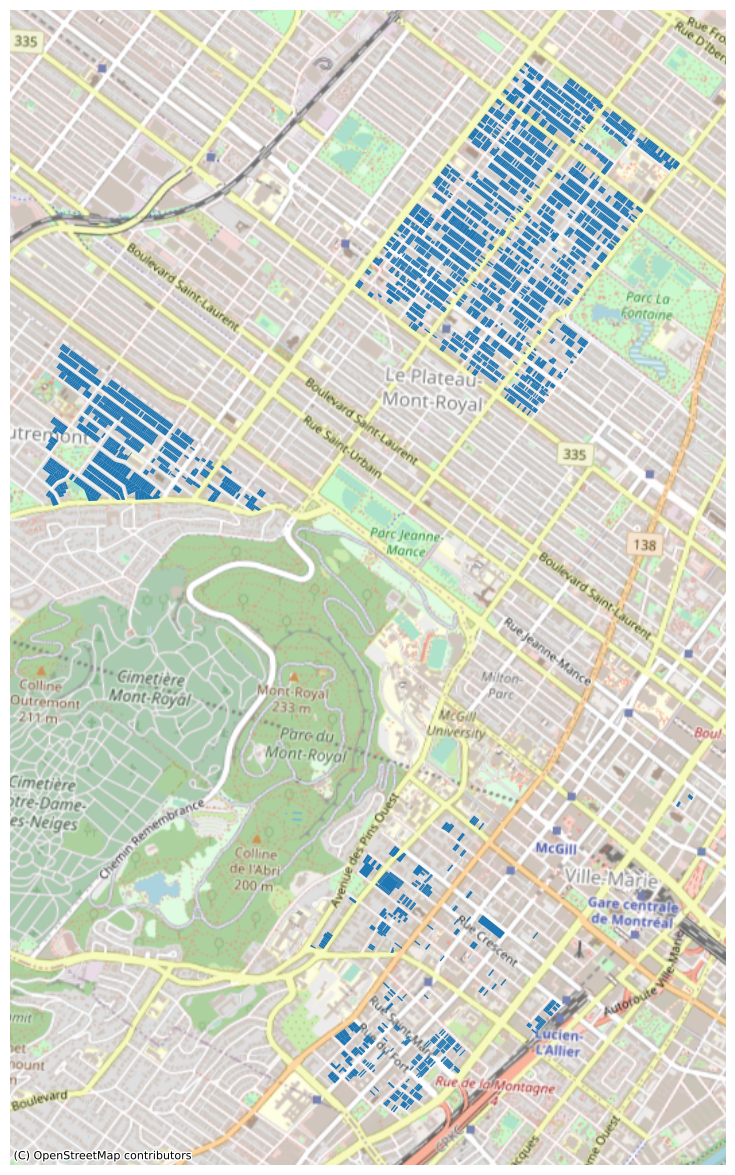

In [20]:
ut.plot_it(all_bldgs[mask_3],edgecolor='none')  

In [28]:
# write a code that merges the values of Postal_code, Price and consumption from HQ_scrapped to all_bldgs through checking for the index
# and for the indexes that are repeating in the HQ_scrapped, we need to aggregate the values of Price and consumption

# first we need to drop the duplicates in HQ_scrapped my summing the values of Price and consumption for a repeated index
HQ_scrapped_sum = HQ_scrapped.groupby('index').sum().reset_index()
HQ_scrapped_sum

# then do the merging based on the index
covered_bldgs = pd.merge(all_bldgs, HQ_scrapped_sum, on='index', how='right')
covered_bldgs


C:\Users\msham\AppData\Local\Temp\ipykernel_2092\1780375397.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  HQ_scrapped_sum = HQ_scrapped.groupby('index').sum().reset_index()


borough_id  building_number  built_area  dwelling_number firstletter_apt  \
0         REM19           2212.0       354.0              6.0               0   
1         REM19           2204.0       189.0              1.0               0   
2         REM19           1947.0         0.0              1.0               0   
3         REM21           2025.0       351.0              2.0               0   
4         REM19           1235.0       404.0              1.0               0   
...         ...              ...         ...              ...             ...   
3896      REM05            381.0       225.0              1.0               0   
3897      REM19           1429.0      1178.0             31.0               0   
3898      REM19           1429.0      1178.0             31.0               0   
3899      REM21           4696.0         0.0              1.0               0   
3900      REM21           4251.0         0.0              3.0               A   

                                                   geom   index  land_area  \
0     {'type': 'Polygon', 'crs': {'type': 'name', 'p...       8      178.0   
1     {'type': 'Polygon', 'crs': {'type': 'name', 'p...      10      166.0   
2     {'type': 'Polygon', 'crs': {'type': 'name', 'p...      39       65.0   
3     {'type': 'Polygon', 'crs': {'type': 'name', 'p...      90      231.0   
4     {'type': 'Polygon', 'crs': {'type': 'name', 'p...     143       36.0   
...                                                 ...     ...        ...   
3896  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  337768      189.0   
3897  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  338002      842.0   
3898  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  338003      842.0   
3899  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  338068       84.0   
3900  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  338154      140.0   

      landuse_code landuse_text  ... street_number        uid  unit_category  \
0           1000.0     Logement  ...        2214.0  1037770.0       Régulier   
1           1000.0     Logement  ...        2206.0  1037773.0       Régulier   
2           1000.0     Logement  ...        1947.0  1037737.0    Condominium   
3           1000.0     Logement  ...        2029.0  1034308.0       Régulier   
4           1000.0     Logement  ...        1235.0  1002503.0    Condominium   
...            ...          ...  ...           ...        ...            ...   
3896        1000.0     Logement  ...         381.0  3033912.0       Régulier   
3897        1000.0     Logement  ...        1433.0  1036824.0       Régulier   
3898        1000.0     Logement  ...        1433.0  1036824.0       Régulier   
3899        1000.0     Logement  ...        4696.0  5169481.0    Condominium   
3900        1000.0     Logement  ...        4253.0  5224699.0    Condominium   

     unit_number year_built  \
0              0     1900.0   
1              0     1900.0   
2              7     1910.0   
3              0     1910.0   
4              0     1900.0   
...          ...        ...   
3896           0     1911.0   
3897           0     9999.0   
3898           0     9999.0   
3899           0     1910.0   
3900           0     1900.0   

                                               geometry  Street_no Error_Code  \
0     POLYGON ((-73.58446 45.49075, -73.58440 45.490...      11070          0   
1     POLYGON ((-73.58429 45.49090, -73.58453 45.491...       2206          0   
2     POLYGON ((-73.58276 45.49334, -73.58285 45.493...      17523          0   
3     POLYGON ((-73.57301 45.53505, -73.57310 45.535...       2029          0   
4     POLYGON ((-73.58193 45.48974, -73.58179 45.489...       1235          0   
...                                                 ...        ...        ...   
3896  POLYGON ((-73.60327 45.52002, -73.60317 45.519...        381          0   
3897  POLYGON ((-73.57719 45.49707, -73.57711 45.497...      12897          0   
3898  POLYGON ((-73.57740 45.497

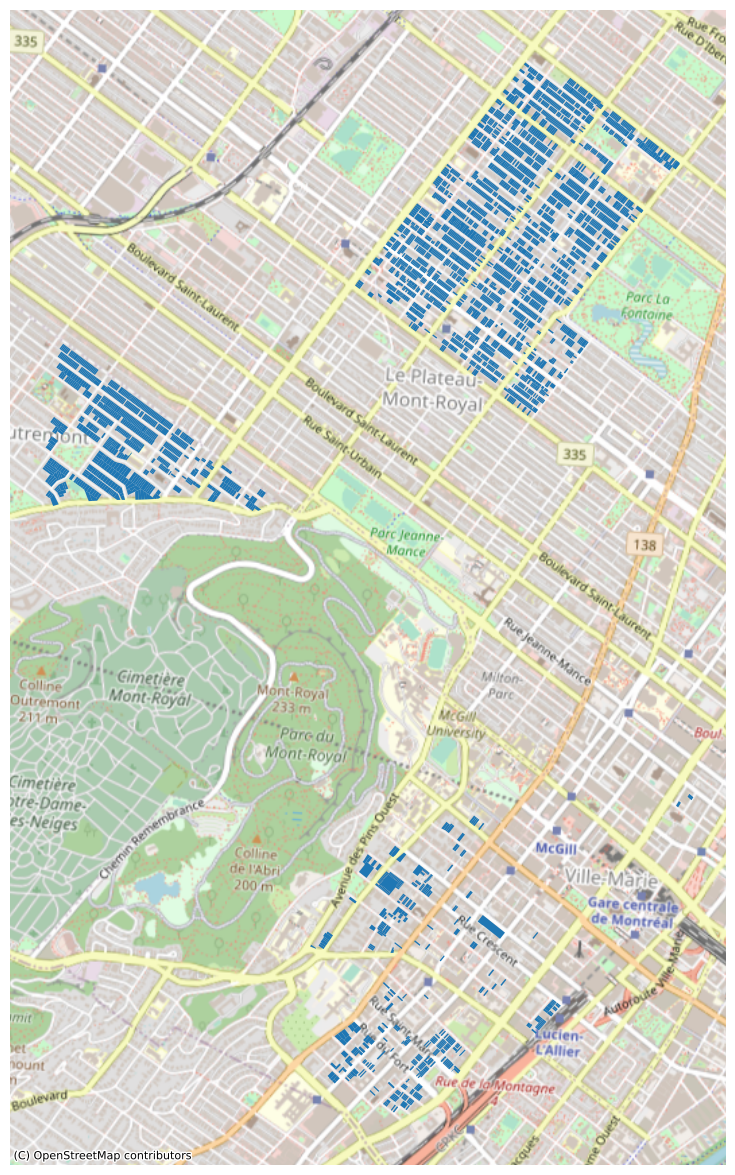

In [38]:
# determine the type of covered_bldgs
type(covered_bldgs)
# turn it into a geodataframe
covered_bldgs = gpd.GeoDataFrame(covered_bldgs)
# plot the covered_bldgs
ut.plot_it(covered_bldgs,edgecolor='none')

In [32]:
covered_bldgs['geometry']

0       POLYGON ((-73.58446 45.49075, -73.58440 45.490...
1       POLYGON ((-73.58429 45.49090, -73.58453 45.491...
2       POLYGON ((-73.58276 45.49334, -73.58285 45.493...
3       POLYGON ((-73.57301 45.53505, -73.57310 45.535...
4       POLYGON ((-73.58193 45.48974, -73.58179 45.489...
                              ...                        
3896    POLYGON ((-73.60327 45.52002, -73.60317 45.519...
3897    POLYGON ((-73.57719 45.49707, -73.57711 45.497...
3898    POLYGON ((-73.57740 45.49717, -73.57727 45.497...
3899    POLYGON ((-73.58159 45.52957, -73.58154 45.529...
3900    POLYGON ((-73.56885 45.53270, -73.56879 45.532...
Name: geometry, Length: 3901, dtype: geometry

In [35]:
covered_bldgs[['index','geom','Consumption']]

index                                               geom  Consumption
0          8  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        12020
1         10  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         5350
2         39  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        56560
3         90  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        15540
4        143  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        11940
...      ...                                                ...          ...
3896  337768  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         2900
3897  338002  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        83440
3898  338003  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        83440
3899  338068  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        18320
3900  338154  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         8890

[3901 rows x 3 columns]

In [33]:
ut.plot_it(covered_bldgs[['geom','Consumption']],edgecolor='none')

there is 'geom' in columns


TypeError: 'float' object is not subscriptable

In [21]:
HQ_scrapped

index  Street_no Postal_Code  Error_Code  Price  Consumption  \
0     219467       4695     H2J 2V4           0  1,750        17880   
1     171065       4170     H2L 3M8           0  1,270        12960   
2      20022        759     H2J 1T8           0  1,920        18850   
3     243369       4696     H2J 2T5           0  2,330        22880   
4      86426       4403     H2J 3X7           0  1,580        15630   
...      ...        ...         ...         ...    ...          ...   
5473  122484        570     H2V 3P5           0  1,670        16910   
5474  122725       5163     H2V 3X7           0    760         7630   
5475   91853        380     H2V 3M2           0    450         3520   
5476   21154       4634     H2J 3J6           0  1,030        10700   
5477    2711       1947     H3H 1P6           0    640         5980   

        City ID                                         Address  
0     501408629            4695 rue Resther Montréal QC H2J 2V4  
1     502588431  4170 av du Parc-Lafontaine Montréal QC H2L 3M8  
2     503475167        759 rue de Bienville Montréal QC H2J 1T8  
3     501405524            4696 rue Pontiac Montréal QC H2J 2T5  
4     500793080          4403 rue Marquette Montréal QC H2J 3X7  
...         ...                                             ...  
5473  500440556         570 av Champagneur Outremont QC H2V 3P5  
5474  500676883           5163 av Durocher Outremont QC H2V 3X7  
5475  500312622           380 av Outremont Outremont QC H2V 3M2  
5476  500844445        4634 rue de la Roche Montréal QC H2J 3J6  
5477  502600220              1947 rue Baile Montréal QC H3H 1P6  

[5478 rows x 8 columns]